# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

In [2]:
df=pd.read_csv('haberman.csv')

In [3]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
#Renaming the columns name
df.rename(columns={'30':'Age','64':'Year','1':'positive_axillary_nodes','1.1':'Survived'},inplace=True)

In [5]:
df.head()

,Age,Year,positive_axillary_nodes,Survived
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# Columns Description
#**1.Age=Age of the Patient during operation**
#**2.Year=The Year When Operation had taken place**
#**3.positve_axillary_nodes=Number of positive axillary nodes detected (positive axillary lymph node is a lymph node in the area of the armpit(axilla) to which cancer has spread.The spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present)**
#**4.Survived=Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                        305 non-null int64
Year                       305 non-null int64
positive_axillary_nodes    305 non-null int64
Survived                   305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


# Objective
#**1.DataSet contains of 305 data points without Null values in all columns**
#**2.We have four features including Label**
#**3.Type of Data Containing in features are of (int64)**
#**4.we do have two classes one is 1 and the other is 2**

In [7]:
df.Survived.value_counts()

1    224
2     81
Name: Survived, dtype: int64

# Objective
#**So our class Label Contains 224 data points that belongs to class 1 and 81 points of class 2**
#**So most of the patient have survived more than 5 years after completion of Surgery**

In [8]:
df.describe()

,Age,Year,positive_axillary_nodes,Survived
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Objectives
1. **Maxmimum age and minimum age of patient are 83 and 30  and most them are in the age of around 53(mean) like in between 42 to 62 which is given by Standard Devaition**
2. **Most of the people between age 42 to 62 are going to have Breast cancer**
#**where 25% of them were below age 44 and 50% of them were below age 52 and 75% of them are below 61**
#**Simlarily most of the operations were performed in between year 1959 to 1965 which is given by mean and std deviation and 25 % of operations Performed before 1960 and 50% of operations were performed before 1963 and 75% of operations performed before 1966**
#**No of Nodes are Occuring in between 0 to 11 nodes almost 75% of them are having nodes less than 4 it seems that less no of cancer cells are present**

In [9]:
df['id']=df.index

In [10]:
pd.pivot_table(df,columns=['Survived'],index=['Age'],values='id',aggfunc='count')[1].sort_values(ascending=False)[:10]

Age
50    10.0
52    10.0
54     9.0
38     9.0
47     8.0
49     8.0
55     8.0
57     8.0
63     7.0
41     7.0
Name: 1, dtype: float64

# Objective
#**1.Top 10 patients who have survived 5 years more after completion**
#**2.people who are having age 50,52 are Survived more than 5 years after completion of Surgery**

# Exploring Through Visualization

C:\Users\Mani\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Mani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


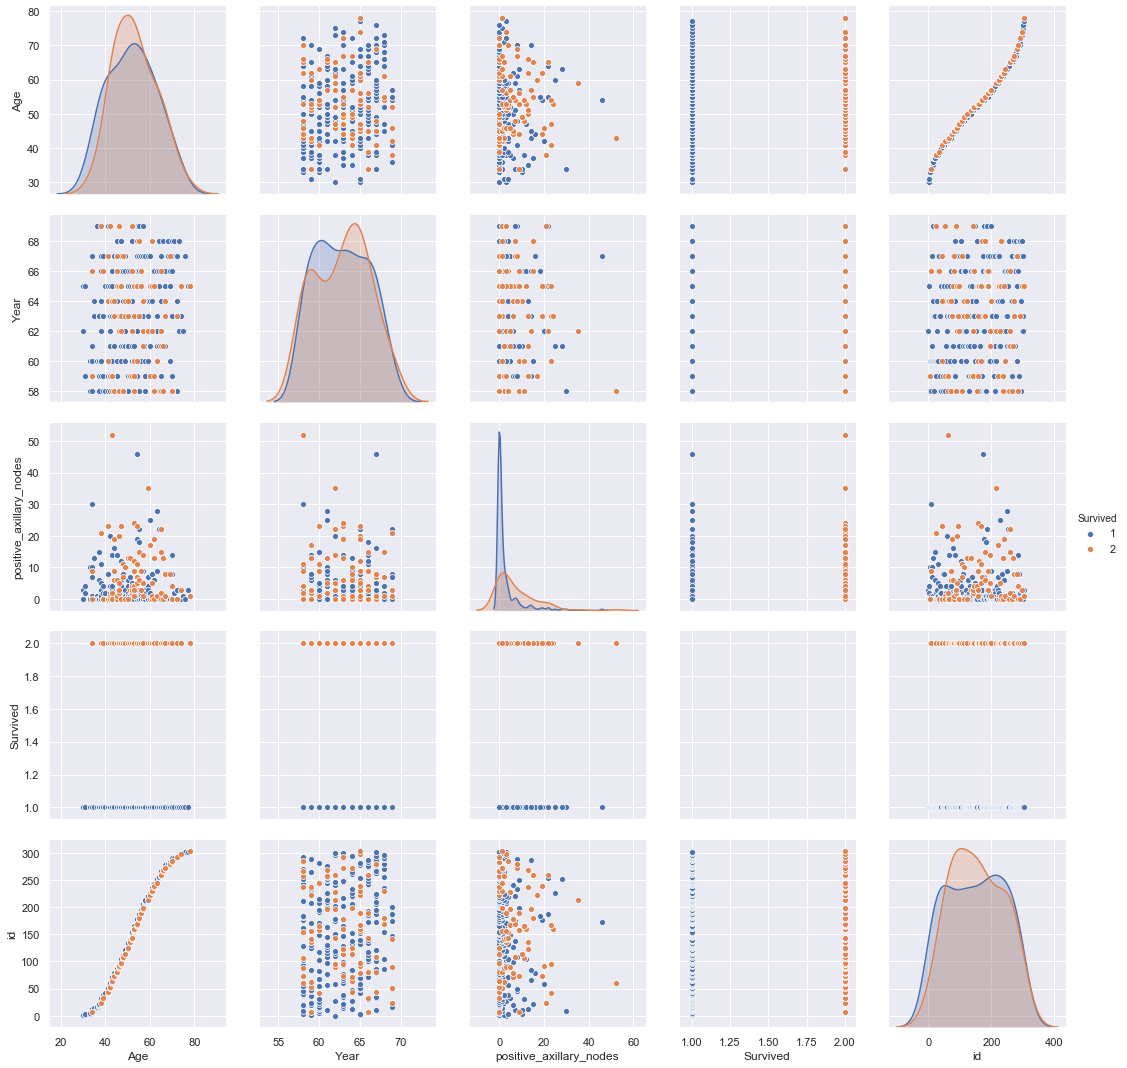

In [11]:
sn.pairplot(df[:-1],hue='Survived',size=3)
plt.show()

**Pair Plot doesn't make any sense of data**

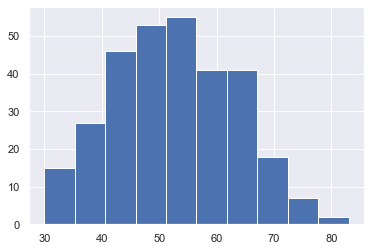

In [12]:
df.Age.hist(bins=10)

# Objective
#**1.Histogram says that most of the patient having Age in between 40 to 65 or 68**
#**2.So most of the people who are aged  in between 40 to 65 are likely to attacked by Cancer**

C:\Users\Mani\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


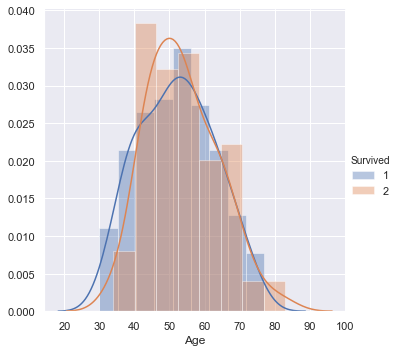

In [13]:
sn.FacetGrid(df,hue='Survived',size=5) \
  .map(sn.distplot,'Age') \
  .add_legend()
plt.show()

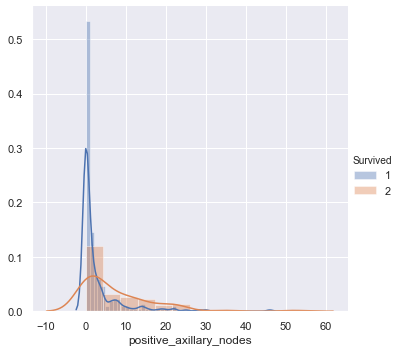

In [14]:
sn.FacetGrid(df,hue='Survived',size=5) \
  .map(sn.distplot,'positive_axillary_nodes') \
  .add_legend()
plt.show()

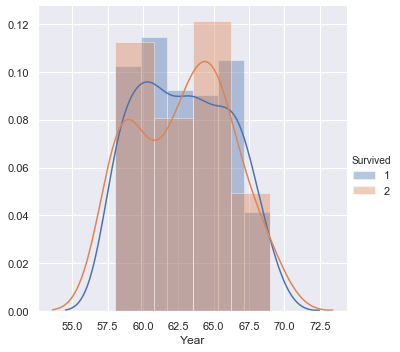

In [15]:
sn.FacetGrid(df,hue='Survived',size=5) \
  .map(sn.distplot,'Year') \
  .add_legend()
plt.show()

# Objective
#**1.Performing density plot on the feature columns with the label**
#**2.We are unable to detect the dependency**
#**3.Distribution of the feature's with respect to Survived label are overlapped so its unable report dependency** 

# Univariate Analysis Using PDF(Probability Density Function)

In [16]:
# Dividing the dataset into two categroies
Survived_more_five=df[df['Survived']==1]
Survived_less_five=df[df['Survived']==2]

In [17]:
#np.histogram returns the input data and bins where the data points fall into it.
counts1,bin_edges1=np.histogram(Survived_more_five['Age'],bins=10,density=True)
counts2,bin_edges2=np.histogram(Survived_less_five['Age'],bins=10,density=True)

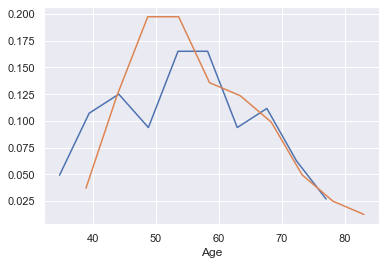

In [18]:
#calculatin the pdf
pdf_more_five=counts1/sum(counts1)
pdf_less_five=counts2/sum(counts2)
plt.plot(bin_edges1[1:],pdf_more_five)
plt.plot(bin_edges2[1:],pdf_less_five)
plt.xlabel('Age')
plt.show()

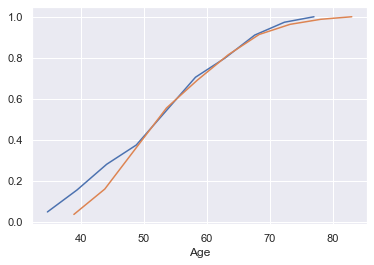

In [19]:
#Lets calculate CDf of the age column
cdf_more_five=np.cumsum(pdf_more_five)
cdf_less_five=np.cumsum(pdf_less_five)
plt.plot(bin_edges1[1:],cdf_more_five)
plt.plot(bin_edges2[1:],cdf_less_five)
plt.xlabel('Age')
plt.show()

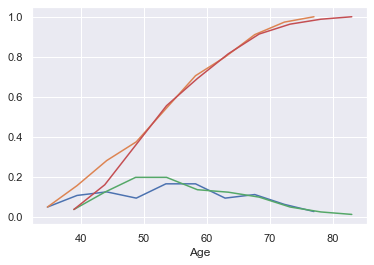

In [20]:
#lets plot pdf and Cdf combinely
plt.plot(bin_edges1[1:],pdf_more_five)
plt.plot(bin_edges1[1:],cdf_more_five)
plt.plot(bin_edges2[1:],pdf_less_five)
plt.plot(bin_edges2[1:],cdf_less_five)
plt.xlabel('Age')
plt.show()

# Conclusion
#**1.We can see that cdf or pdf of surivived more than 5 or less than 5 with repect to Age are overlapped**
#**2.if we try to build a model using Age atrribute we may get accuracy of 10 to 15 % most of the cdf graph parts are overlapped** 

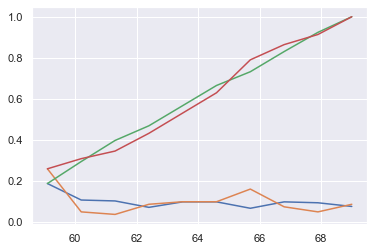

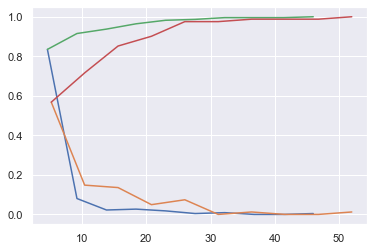

In [21]:
for i in df.columns[1:-2]:
    counts1,bin_edges1=np.histogram(Survived_more_five[i],bins=10,density=True)
    counts2,bin_edges2=np.histogram(Survived_less_five[i],bins=10,density=True)
    pdf_more_five=counts1/sum(counts1)
    pdf_less_five=counts2/sum(counts2)
    cdf_more_five=np.cumsum(pdf_more_five)
    cdf_less_five=np.cumsum(pdf_less_five)
    plt.plot(bin_edges1[1:],pdf_more_five)
    plt.plot(bin_edges2[1:],pdf_less_five)
    plt.plot(bin_edges1[1:],cdf_more_five)
    plt.plot(bin_edges2[1:],cdf_less_five)
    plt.show()

# Conclusion
#**1. By the Pdf and Cdf between Survived and Year and Positve Axillary Nodes not conveying any infromation**
#**2.We cannot build model using Year and Positive axillary nodes  attribute**
#**3.both cdf and pdf are overlapped so its impossible to build model using cdf and pdf using Year and Positive_Axillary_Nodes**

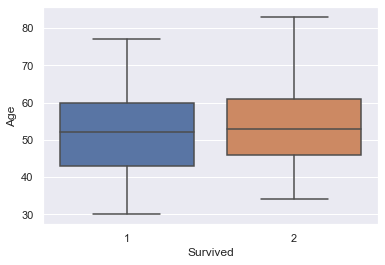

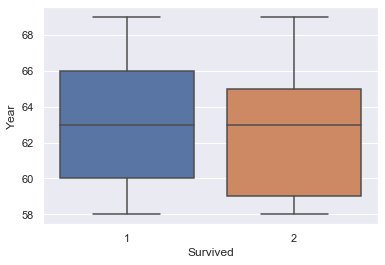

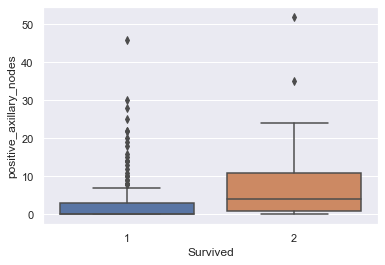

In [22]:
for i in df.columns[:-2]:
    sn.boxplot(x='Survived',y=i,data=df)
    plt.show()

# Objective:
#**1.Box plots doesnt provide any infromation regrading classification so its not suitable for model building**
#**2.But gives information regarding Quartiles of Data Points**
#**3.If we see Age ,Year and Positive_axillary_nodes it gives information about inter quartile ranges of the respective columns**

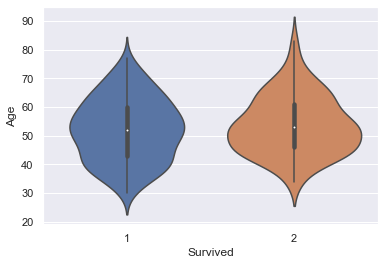

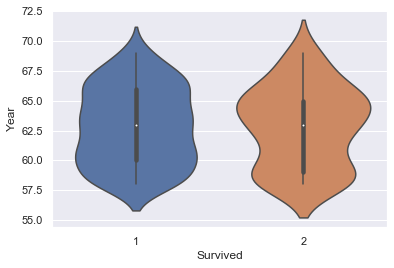

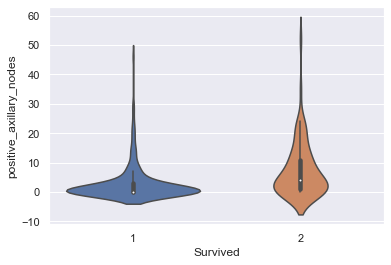

In [23]:
for i in df.columns[:-2]: 
    sn.violinplot(x='Survived',y=i,data=df)
    plt.show()

# objective:
#**1.violin plot gives the distribution of the data points with respect to columns**
#**2.if we see positive_axillary_nodes most of the patients are having less no of nodes** 